Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

   0    0    0       1.00      1.00      1.00       186
   0    0  195       1.00      1.00      1.00       172
   0  225    0       1.00      1.00      1.00       158
   0  225  195       1.00      1.00      1.00       162
 255    0    0       1.00      1.00      1.00       177
 255    0  195       1.00      1.00      1.00       158
 255  225    0       1.00      1.00      1.00       168
 255  225  195       1.00      1.00      1.00       159

      accuracy                           1.00      1340
     macro avg       1.00      1.00      1.00      1340
  weighted avg       1.00      1.00      1.00      1340



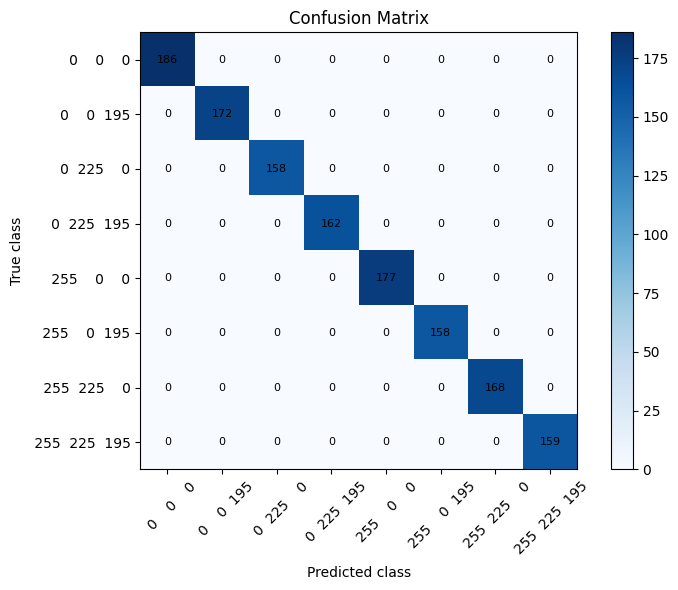

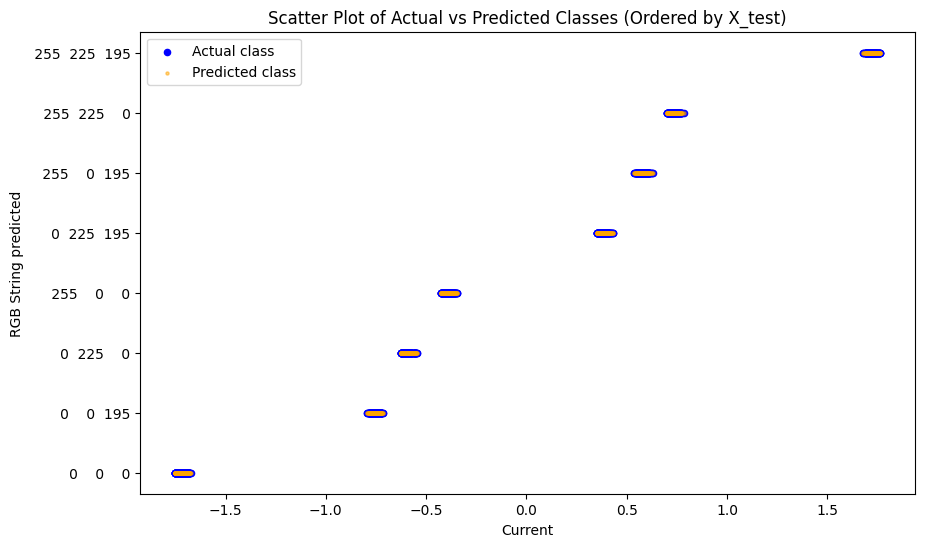

weights: 
[array([[ -0.25089933,  26.89338957,  11.39310789, -46.85795155,
        -12.38099202]]), array([[ -0.65134435,   0.63842976,   0.45166381,  -0.39082235,
         -0.43227953,  -0.43013353,  -0.26596075,   0.03363463],
       [ -5.96550148,  -6.61820242,  -9.65419239,  -9.54831475,
         -9.68468221,   3.52958303,   8.31916032,  28.77202407],
       [-31.263866  , -25.29442319, -26.35957149,  31.72593952,
        -14.80025714,  30.07166512,  27.54386616,   7.21472555],
       [ 15.73055248,  12.79676976,   6.81712941, -10.09031972,
         -5.20715492, -12.63433931,  -6.30143969,  -1.22271921],
       [  1.1685356 ,   5.44110363,  10.99732709,   0.99588479,
         15.10511563,  -4.73371842, -12.19029137, -17.56060627]])]

biases: 
[array([ -0.68801096,  -8.11935645,   7.36864744, -13.55679862,
         9.70780165]), array([-28.18066115,   2.73579538,   8.81836307,  15.10779867,
        16.89297484,   4.30910968,   7.95873189, -25.76258686])]



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def sort_lists(x, y):
  # Create a list of tuples to combine data and sorting key
  data_list = list(zip(x, y))
  sorted_data = sorted(data_list, key=lambda x: x[0])  # Sort by first element (x_data)

  # Unpack the sorted data
  x, y = zip(*sorted_data)
  
  return x, y

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.24-03h39m42s-rgb_combinations_labeled_ordered.csv", sep=',')

# Create separate lists for current and RGB values
x = df[['current']].values.reshape(-1, 1)
y = df['   R    G    B']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, y_train = sort_lists(X_train, y_train)
X_test, y_test = sort_lists(X_test, y_test)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLPClassifier with one hidden layer and set the number of classes as the output layer size
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=42, solver='lbfgs', activation='relu')

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, label='Actual class', color='blue')
plt.scatter(X_test, y_pred, s=5, label='Predicted class', color='orange', alpha=0.5)
plt.xlabel('Current')
plt.ylabel('RGB String predicted')
plt.title('Scatter Plot of Actual vs Predicted Classes (Ordered by X_test)')
plt.legend()
plt.show()

# Extract the weights and biases from the trained model
weights = mlp.coefs_
biases = mlp.intercepts_

# Convert ndarrays to lists within each list
weights_list = [[arr.tolist() for arr in layer] for layer in weights]
biases_list = [bias.tolist() for bias in biases]

# Open files for writing in JSON format
import json
with open("weights.json", "w") as f_weights, open("biases.json", "w") as f_biases:
  json.dump(weights_list, f_weights)
  json.dump(biases_list, f_biases)
    
print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

# Save the classifier
import pickle
with open('classifier_nn.pkl', 'wb') as f:
    pickle.dump(mlp, f)

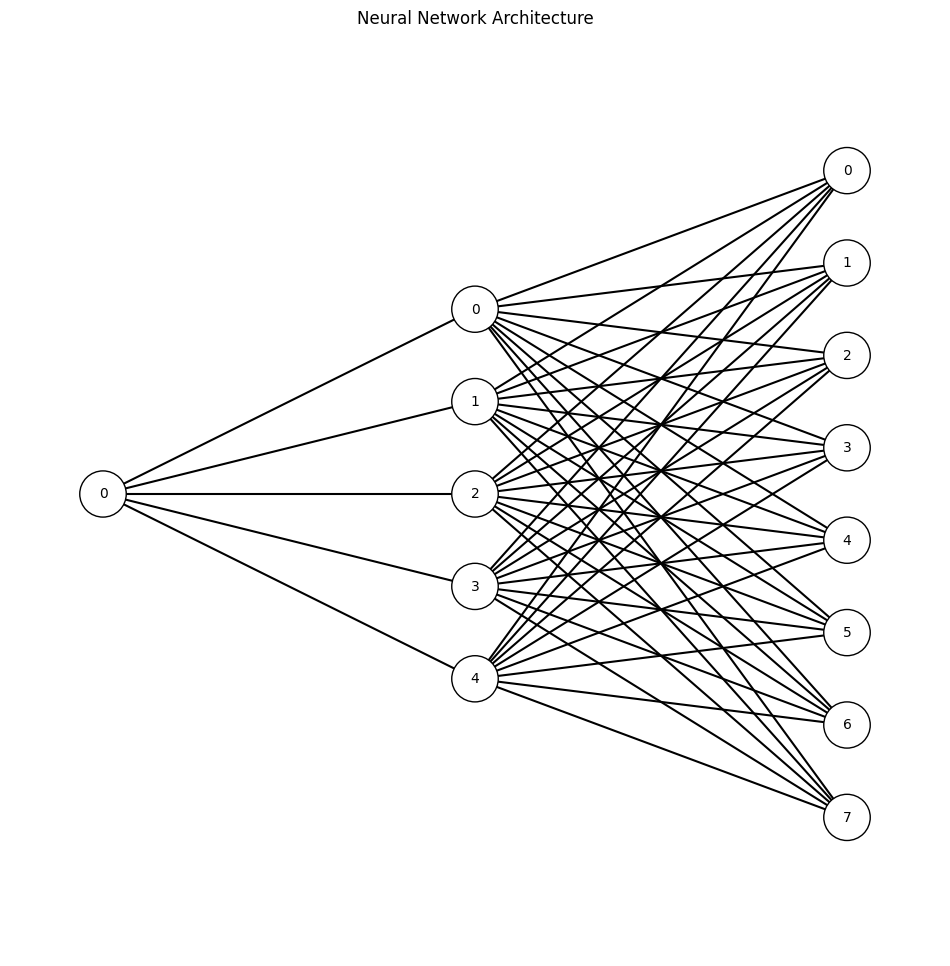

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from sklearn.neural_network import MLPClassifier

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib.axes.Axes, the axes on which to plot the cartoon (get e.g. by plt.gca())
    :param left: float, the center of the leftmost node(s) will be placed here
    :param right: float, the center of the rightmost node(s) will be placed here
    :param bottom: float, the center of the bottommost node(s) will be placed here
    :param top: float, the center of the topmost node(s) will be placed here
    :param layer_sizes: list of int, list containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Annotation for nodes
            ax.text(n*h_spacing + left, layer_top - m*v_spacing, '{}'.format(m), ha='center', va='center', zorder=5)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Load the classifier
with open('classifier_nn.pkl', 'rb') as f:
    clf = pickle.load(f)

# Define the architecture of the network
if isinstance(clf.hidden_layer_sizes, int):
    layer_sizes = [clf.n_features_in_] + [clf.hidden_layer_sizes] + [clf.n_outputs_]
else:
    layer_sizes = [clf.n_features_in_] + list(clf.hidden_layer_sizes) + [clf.n_outputs_]

# Plot the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title('Neural Network Architecture')
plt.show()

In [11]:
import numpy as np
import json

# File paths for weights and biases
weights_file = "weights.json"
biases_file = "biases.json"

# Open JSON files and load data
with open(weights_file, "r") as f_weights, open(biases_file, "r") as f_biases:
  weights_list = json.load(f_weights)
  biases_list = json.load(f_biases)
  
# Convert nested lists to ndarrays (assuming they represent ndarrays)
weights = [[np.array(arr) for arr in layer] for layer in weights_list]

# Convert biases_list to ndarrays (assuming they represent ndarrays)
biases = [np.array(bias) for bias in biases_list]

print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

weights: 
[[array([ -0.25089933,  26.89338957,  11.39310789, -46.85795155,
       -12.38099202])], [array([-0.65134435,  0.63842976,  0.45166381, -0.39082235, -0.43227953,
       -0.43013353, -0.26596075,  0.03363463]), array([-5.96550148, -6.61820242, -9.65419239, -9.54831475, -9.68468221,
        3.52958303,  8.31916032, 28.77202407]), array([-31.263866  , -25.29442319, -26.35957149,  31.72593952,
       -14.80025714,  30.07166512,  27.54386616,   7.21472555]), array([ 15.73055248,  12.79676976,   6.81712941, -10.09031972,
        -5.20715492, -12.63433931,  -6.30143969,  -1.22271921]), array([  1.1685356 ,   5.44110363,  10.99732709,   0.99588479,
        15.10511563,  -4.73371842, -12.19029137, -17.56060627])]]

biases: 
[array([ -0.68801096,  -8.11935645,   7.36864744, -13.55679862,
         9.70780165]), array([-28.18066115,   2.73579538,   8.81836307,  15.10779867,
        16.89297484,   4.30910968,   7.95873189, -25.76258686])]



In [14]:
# 0.069850	5
# 0.083289	4
# 0.085641	0
# 0.088599	6
# 0.099266	3
# 0.101828	1
# 0.104111	2
# 0.117829	7

input = 0.05 # output: 3

import sys
sys.path.append('./')  # Add the directory to the path (if needed)
import mlp_custom

clf = mlp_custom.MLP(weights, biases)
class_number = clf.predict(input)
print('Predicted class:', class_number)

Predicted class: [[  0.           0.           0.         276.00926418  36.69070229
  200.00350118 115.81574705   0.        ]]


/home/cas/work/Projects/ML_predict_target_board_RGB_LED_state-ESP32-S3_CircuitPython/03_pc_linux_software/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

   0    0    0       1.00      1.00      1.00       186
   0    0  195       1.00      1.00      1.00       172
   0  225    0       1.00      1.00      1.00       158
   0  225  195       1.00      1.00      1.00       162
 255    0    0       1.00      1.00      1.00       177
 255    0  195       1.00      1.00      1.00       158
 255  225    0       1.00      1.00      1.00       168
 255  225  195       1.00      1.00      1.00       159

      accuracy                           1.00      1340
     macro avg       1.00      1.00      1.00      1340
  weighted avg       1.00      1.00      1.00      1340



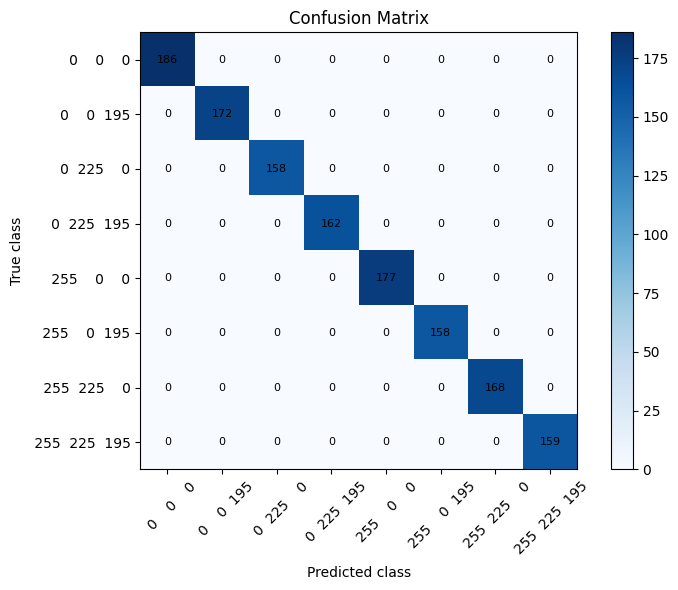

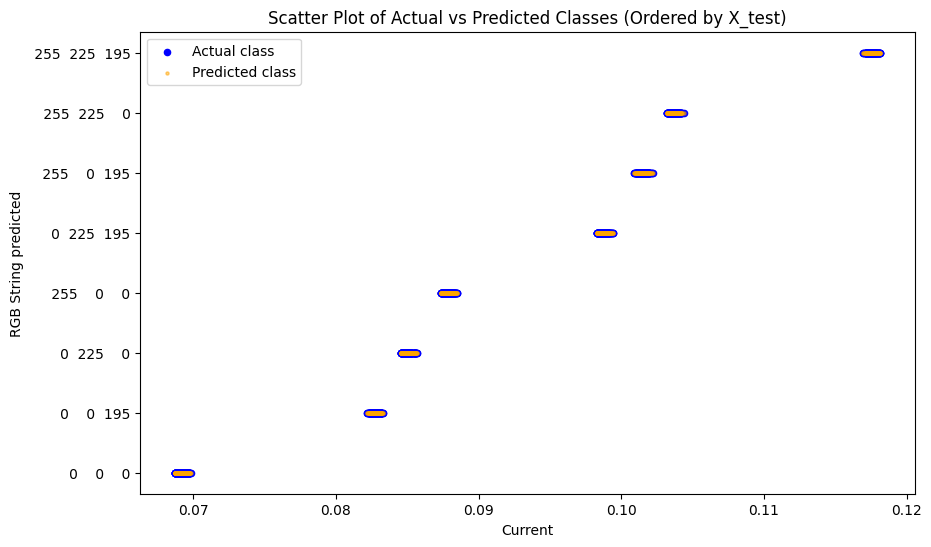

weights: 
[array([[ 4.18265376e+01, -1.88607370e+02,  2.97220883e+02,
         1.68546855e-01,  1.28919994e+02, -3.29746726e+02,
        -7.54964137e-01]]), array([[-4.10897300e-01, -4.08857449e-01, -3.51251561e-01,
         3.19709276e-02,  1.03212085e+02,  4.58040416e+00,
         2.01991615e+01],
       [-4.65564498e-01, -2.68428362e-01,  1.29248498e-01,
        -5.67320595e-02, -4.40928596e+02, -5.92667922e-02,
        -4.87363524e+01],
       [ 1.19345935e-01, -5.85722580e-01, -5.59298976e-01,
        -4.25491425e-01, -2.32012550e+02,  9.71322952e+00,
         5.38620611e+00],
       [ 3.98270212e-01, -2.52325502e-01, -5.19573899e-01,
         2.37922041e-01, -7.72882100e-02, -4.88107026e-01,
        -6.22863019e-03],
       [-6.01299536e-01,  5.28604167e-01, -7.53963163e-01,
         2.09884375e-01,  3.03766507e+02,  6.37288925e+00,
         5.07141476e+01],
       [-4.06984961e-01,  6.06430536e-01,  3.48304052e+00,
         5.67577308e-01,  3.51990865e+02,  1.34142339e+01,
     

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def sort_lists(x, y):
  # Create a list of tuples to combine data and sorting key
  data_list = list(zip(x, y))
  sorted_data = sorted(data_list, key=lambda x: x[0])  # Sort by first element (x_data)

  # Unpack the sorted data
  x, y = zip(*sorted_data)
  
  return x, y

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.24-03h39m42s-rgb_combinations_labeled_ordered.csv", sep=',')

# Create separate lists for current and RGB values
x = df[['current']].values.reshape(-1, 1)
y = df['   R    G    B']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, y_train = sort_lists(X_train, y_train)
X_test, y_test = sort_lists(X_test, y_test)

# # Standardize the features (important for neural networks)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize the MLPClassifier with one hidden layer and set the number of classes as the output layer size
mlp = MLPClassifier(hidden_layer_sizes=(7,7), max_iter=500, random_state=42, solver='lbfgs', activation='relu')

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, label='Actual class', color='blue')
plt.scatter(X_test, y_pred, s=5, label='Predicted class', color='orange', alpha=0.5)
plt.xlabel('Current')
plt.ylabel('RGB String predicted')
plt.title('Scatter Plot of Actual vs Predicted Classes (Ordered by X_test)')
plt.legend()
plt.show()

# Extract the weights and biases from the trained model
weights = mlp.coefs_
biases = mlp.intercepts_

# Convert ndarrays to lists within each list
weights_list = [[arr.tolist() for arr in layer] for layer in weights]
biases_list = [bias.tolist() for bias in biases]

# Open files for writing in JSON format
import json
with open("weights.json", "w") as f_weights, open("biases.json", "w") as f_biases:
  json.dump(weights_list, f_weights)
  json.dump(biases_list, f_biases)
    
print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

# Save the classifier
import pickle
with open('classifier_nn.pkl', 'wb') as f:
    pickle.dump(mlp, f)

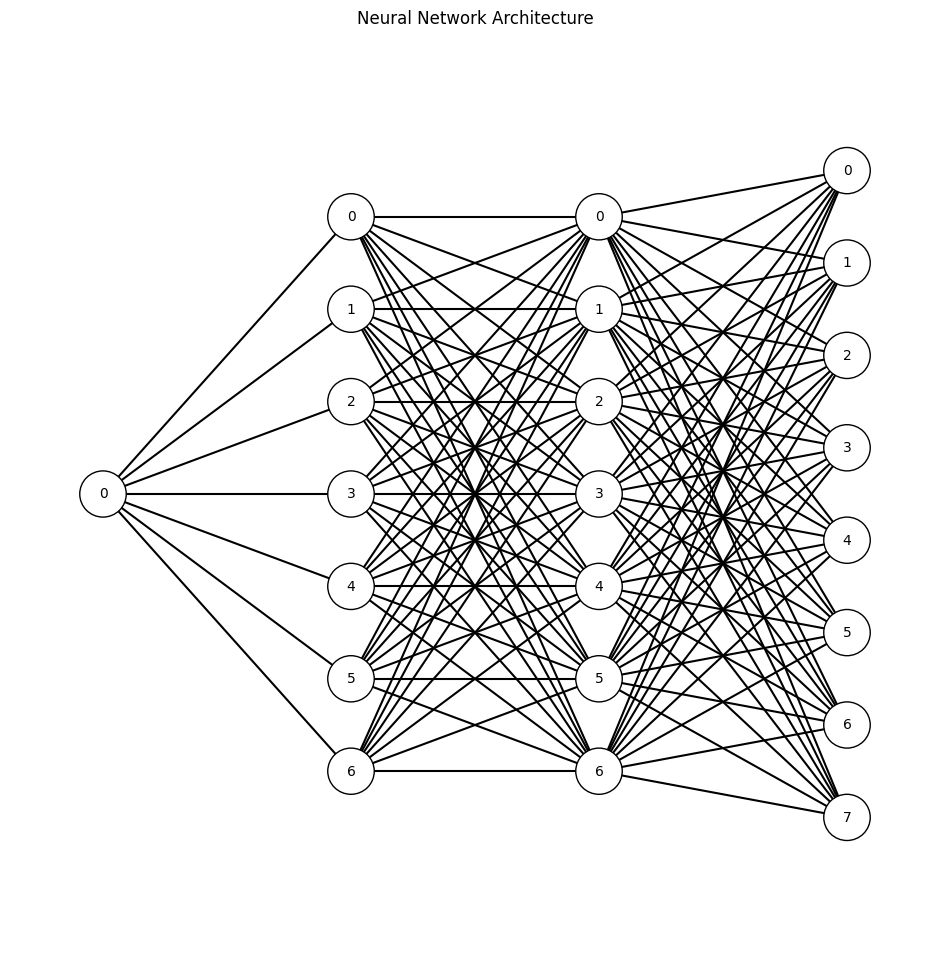

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from sklearn.neural_network import MLPClassifier

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib.axes.Axes, the axes on which to plot the cartoon (get e.g. by plt.gca())
    :param left: float, the center of the leftmost node(s) will be placed here
    :param right: float, the center of the rightmost node(s) will be placed here
    :param bottom: float, the center of the bottommost node(s) will be placed here
    :param top: float, the center of the topmost node(s) will be placed here
    :param layer_sizes: list of int, list containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Annotation for nodes
            ax.text(n*h_spacing + left, layer_top - m*v_spacing, '{}'.format(m), ha='center', va='center', zorder=5)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Load the classifier
with open('classifier_nn.pkl', 'rb') as f:
    clf = pickle.load(f)

# Define the architecture of the network
if isinstance(clf.hidden_layer_sizes, int):
    layer_sizes = [clf.n_features_in_] + [clf.hidden_layer_sizes] + [clf.n_outputs_]
else:
    layer_sizes = [clf.n_features_in_] + list(clf.hidden_layer_sizes) + [clf.n_outputs_]

# Plot the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title('Neural Network Architecture')
plt.show()

In [21]:
import numpy as np
import json

# File paths for weights and biases
weights_file = "weights.json"
biases_file = "biases.json"

# Open JSON files and load data
with open(weights_file, "r") as f_weights, open(biases_file, "r") as f_biases:
  weights_list = json.load(f_weights)
  biases_list = json.load(f_biases)
  
# Convert nested lists to ndarrays (assuming they represent ndarrays)
weights = [[np.array(arr) for arr in layer] for layer in weights_list]

# Convert biases_list to ndarrays (assuming they represent ndarrays)
biases = [np.array(bias) for bias in biases_list]

print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

weights: 
[[array([ 4.18265376e+01, -1.88607370e+02,  2.97220883e+02,  1.68546855e-01,
        1.28919994e+02, -3.29746726e+02, -7.54964137e-01])], [array([-4.10897300e-01, -4.08857449e-01, -3.51251561e-01,  3.19709276e-02,
        1.03212085e+02,  4.58040416e+00,  2.01991615e+01]), array([-4.65564498e-01, -2.68428362e-01,  1.29248498e-01, -5.67320595e-02,
       -4.40928596e+02, -5.92667922e-02, -4.87363524e+01]), array([ 1.19345935e-01, -5.85722580e-01, -5.59298976e-01, -4.25491425e-01,
       -2.32012550e+02,  9.71322952e+00,  5.38620611e+00]), array([ 0.39827021, -0.2523255 , -0.5195739 ,  0.23792204, -0.07728821,
       -0.48810703, -0.00622863]), array([-6.01299536e-01,  5.28604167e-01, -7.53963163e-01,  2.09884375e-01,
        3.03766507e+02,  6.37288925e+00,  5.07141476e+01]), array([ -0.40698496,   0.60643054,   3.48304052,   0.56757731,
       351.99086478,  13.41423395,  37.97118964]), array([-0.53142862, -0.39261352, -0.58730215, -0.22557174, -0.14376427,
       -0.29528422

In [24]:
# 0.069850	0
# 0.083289	1
# 0.085641	2
# 0.088599	3
# 0.099266	4
# 0.101828	5
# 0.104111	6
# 0.117829	7

input = 0.1 # output: 0

import sys
sys.path.append('./')  # Add the directory to the path (if needed)
import mlp_custom

clf = mlp_custom.MLP(weights, biases)
class_number = clf.predict(input)
print('Predicted class:', class_number)

Predicted class: [[    0.             0.         15795.22405529 52520.40574525
  26398.29272628 52520.10326392 52479.8468913  52318.45833208]]
